In [78]:
import tensorflow

In [79]:
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import random as rand
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx
import shap
from sklearn.preprocessing import MinMaxScaler

## Import Panama GPS data 

In [53]:
path = r"Z:\Groups\TMG\Research\2022\CAF\ModeImputationModel\Panama\PAN_GPS_trips_all_features_apply_model.csv"
Panama_GPS = pd.read_csv(path)

In [54]:
Panama_GPS = Panama_GPS.sort_index(axis=1)

In [55]:
Panama_GPS = Panama_GPS.drop(['Area_km2_x', 'Area_km2_y', 'Com_perZone_dest', 'Com_perZone_orig',
                              'DestinationLat',
       'DestinationLon', 'DestinationTaz', 'DeviceId', 'Ind_perZone_dest',
       'Ind_perZone_orig','NSE', 'OriginLat', 'OriginLon', 'OriginTaz','Population_x', 'Population_y',
                              'RoadDistance','Serv_perZone_dest', 'Serv_perZone_orig','Taz_home','TripEndTime', 'TripStartTime',
'Trip_EndTime_Period',  'Trip_StartTime_Period','Weekend', 'Zone_x', 'Zone_y','Trip_EndTime_Period_Dawn', 'Trip_StartTime_Period_Dawn',
                              
                              
                              
                                       ],axis=1)
Panama_GPS.columns

Index(['Com_perZone_perKM2_dest', 'Com_perZone_perKM2_orig',
       'Ind_perZone_perKM2_dest', 'Ind_perZone_perKM2_orig',
       'Intrazonal_trips', 'NSE_1 Alto', 'NSE_2 Medio-Alto', 'NSE_3 Medio',
       'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'PopPerKM2_Zone_Dest',
       'PopPerKM2_Zone_Orig', 'RoadTime (h)', 'Serv_perZone_perKM2_dest',
       'Serv_perZone_perKM2_orig', 'TripDuration (h)',
       'Trip_EndTime_Period_Afternoon', 'Trip_EndTime_Period_Evening_Peak',
       'Trip_EndTime_Period_Morning_OffPeak',
       'Trip_EndTime_Period_Morning_Peak', 'Trip_EndTime_Period_Night',
       'Trip_StartTime_Period_Afternoon', 'Trip_StartTime_Period_Evening_Peak',
       'Trip_StartTime_Period_Morning_OffPeak',
       'Trip_StartTime_Period_Morning_Peak', 'Trip_StartTime_Period_Night',
       'Weekday', 'distance', 'place_dest', 'place_orig'],
      dtype='object')

In [56]:
Panama_GPS_final = Panama_GPS.rename(columns={
'Agro_perZone_perKM2_dest':'Agro2018_perZAT_perKM2_dest', 
    'Agro_perZone_perKM2_orig':'Agro2018_perZAT_perKM2_orig',
       'Com_perZone_perKM2_dest':'Com2018_perZAT_perKM2_dest', 
    'Com_perZone_perKM2_orig':'Com2018_perZAT_perKM2_orig',
       'Ind_perZone_perKM2_dest': 'Ind2018_perZAT_perKM2_dest', 
    'Ind_perZone_perKM2_orig':'Ind2018_perZAT_perKM2_orig',
       'Intrazonal_trips':'intra_zonal_trip', 

    
       'PopPerKM2_Zone_Dest':'PopPerKM2_ZAT_Dest', 
    'PopPerKM2_Zone_Orig':'PopPerKM2_ZAT_Orig', 
    
       'RoadTime (h)':'RoadTime',
    
    'Serv_perZone_perKM2_dest':'Serv2018_perZAT_perKM2_dest', 
    'Serv_perZone_perKM2_orig':'Serv2018_perZAT_perKM2_orig',
    
       'Total_stops_perZone_perKM2_dest':'total_num_transit_stops_perKM2_dest', 
    'Total_stops_perZone_perKM2_orig':'total_num_transit_stops_perKM2_origin',
    
       'TripDuration (h)':'Trip_TravelTime_Length_hour', 
    
    
       'Trip_EndTime_Period_Afternoon':'EndTime_Afternoon',
       'Trip_EndTime_Period_Evening_Peak':'EndTime_EveningPeak',
       'Trip_EndTime_Period_Morning_OffPeak':'EndTime_MorningOffPeak',
       'Trip_EndTime_Period_Morning_Peak':'EndTime_MorningPeak', 
    'Trip_EndTime_Period_Night':'EndTime_Night',
       
    'Trip_StartTime_Period_Afternoon': 'StartTime_Afternoon',
    'Trip_StartTime_Period_Evening_Peak':'StartTime_EveningPeak',
       'Trip_StartTime_Period_Morning_OffPeak':'StartTime_MorningOffPeak',
       'Trip_StartTime_Period_Morning_Peak':'StartTime_MorningPeak', 
    'Trip_StartTime_Period_Night':'StartTime_Night',
    
       'Weekday':'Trip_Weekday', 

    'place_dest':'Dest_Home',
    'place_orig':'Origin_Home',


})


In [57]:
Panama_GPS_final.columns

Index(['Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig',
       'Ind2018_perZAT_perKM2_dest', 'Ind2018_perZAT_perKM2_orig',
       'intra_zonal_trip', 'NSE_1 Alto', 'NSE_2 Medio-Alto', 'NSE_3 Medio',
       'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'PopPerKM2_ZAT_Dest',
       'PopPerKM2_ZAT_Orig', 'RoadTime', 'Serv2018_perZAT_perKM2_dest',
       'Serv2018_perZAT_perKM2_orig', 'Trip_TravelTime_Length_hour',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'StartTime_Afternoon',
       'StartTime_EveningPeak', 'StartTime_MorningOffPeak',
       'StartTime_MorningPeak', 'StartTime_Night', 'Trip_Weekday', 'distance',
       'Dest_Home', 'Origin_Home'],
      dtype='object')

In [58]:
Panama_GPS_final = Panama_GPS_final.sort_index(axis=1)

## Import Bogota survey

In [59]:
path = r"Z:\Groups\TMG\Research\2022\CAF\ModeImputationModel\Bogota_survey_final_features_2023_04_23_b.csv"

In [60]:
bogota_basetrips = pd.read_csv(path)

In [61]:
bogota_basetrips  = bogota_basetrips [bogota_basetrips.Mode_Other != 1]
bogota_basetrips = bogota_basetrips.drop(['Mode_Other'], axis=1)
bogota_basetrips

,Unnamed: 0,Trip_TravelTime_Length_hour,Trip_Weekday,RoadTime,PopPerKM2_ZAT_Orig,PopPerKM2_ZAT_Dest,Agro2018_perZAT_perKM2_orig,Com2018_perZAT_perKM2_orig,Ind2018_perZAT_perKM2_orig,Serv2018_perZAT_perKM2_orig,...,Dest_Home,EndTime_MorningPeak,EndTime_MorningOffPeak,EndTime_Afternoon,EndTime_EveningPeak,EndTime_Night,distance,Mode_Active,Mode_Private,Mode_Transit
0,0,0.500000,1,15.570941,15732.947770,52788.514900,30.0595,681.2663,415.4123,1188.8282,...,0,1,0,0,0,0,9.602431,0,0,1
1,1,0.483333,1,13.960943,52788.514900,15732.947770,7.8866,610.4243,264.0440,509.1601,...,1,0,1,0,0,0,9.602431,0,1,0
2,2,0.483333,1,5.324356,33192.918240,15732.947770,8.6416,574.6680,399.1607,551.2121,...,1,0,1,0,0,0,3.504679,0,1,0
3,3,0.500000,1,5.306601,15732.947770,33192.918240,30.0595,681.2663,415.4123,1188.8282,...,0,1,0,0,0,0,3.504679,0,0,1
4,4,2.666667,0,15.747559,1507.511358,52788.514900,1.8667,39.1998,23.0221,67.8219,...,1,0,0,0,0,1,10.323526,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,126740,0.100000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,0,1,0,0,0.000000,1,0,0
126741,126741,0.150000,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,1,0,1,0,0,0,0.000000,1,0,0
126742,126742,0.066667,1,0.000000,38956.975570,38956.975570,2.0803,375.4875,265.5803,412.9322,...,0,1,0,0,0,0,0.000000,1,0,0
126743,126743,0.500000,1,68.465490,38956.975570,0.000000,2.0803,375.4875,265.5803,412.9322,...,0,0,0,0,1,0,21.262741,0,1,0


In [62]:
bogota_basetrips['intra_zonal_trip'] = bogota_basetrips['origin_taz'].eq(bogota_basetrips['dest_taz']).astype(int)

In [63]:
bogota_basetrips = bogota_basetrips.sort_index(axis=1)

In [64]:
#### NEW mode equivalents
y = pd.DataFrame(bogota_basetrips[['Mode_Active','Mode_Private','Mode_Transit']])
X = bogota_basetrips.drop(['Mode', 'Mode_Active','Mode_Private','Mode_Transit'],axis=1)

In [65]:
X.drop(['Unnamed: 0','num_alimentadores_stops_perKM2_dest',
       'num_alimentadores_stops_perKM2_origin',
       'num_complementaria_stops_perKM2_dest',
       'num_complementaria_stops_perKM2_origin',
       'num_especial_stops_perKM2_dest', 'num_especial_stops_perKM2_origin',
       'num_troncal_stops_perKM2_dest', 'num_troncal_stops_perKM2_origin','total_length_transit_km_perKM2_origin',
       'total_num_transit_stops_perKM2_dest','dest_taz','origin_taz','Agro2018_perZAT_perKM2_dest', 'Agro2018_perZAT_perKM2_orig',
       'total_length_transit_km_perKM2_dest',
       'total_num_transit_stops_perKM2_origin', 'transfers','duration (h)',
       ]
        , axis=1, inplace=True)

In [66]:
X.columns

Index(['Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home',
       'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig', 'RoadTime',
       'Serv2018_perZAT_perKM2_dest', 'Serv2018_perZAT_perKM2_orig',
       'StartTime_Afternoon', 'StartTime_EveningPeak',
       'StartTime_MorningOffPeak', 'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'distance',
       'intra_zonal_trip'],
      dtype='object')

In [67]:
Panama_GPS_final.columns

Index(['Com2018_perZAT_perKM2_dest', 'Com2018_perZAT_perKM2_orig', 'Dest_Home',
       'EndTime_Afternoon', 'EndTime_EveningPeak', 'EndTime_MorningOffPeak',
       'EndTime_MorningPeak', 'EndTime_Night', 'Ind2018_perZAT_perKM2_dest',
       'Ind2018_perZAT_perKM2_orig', 'NSE_1 Alto', 'NSE_2 Medio-Alto',
       'NSE_3 Medio', 'NSE_4 Medio-Bajo', 'NSE_5 Bajo', 'Origin_Home',
       'PopPerKM2_ZAT_Dest', 'PopPerKM2_ZAT_Orig', 'RoadTime',
       'Serv2018_perZAT_perKM2_dest', 'Serv2018_perZAT_perKM2_orig',
       'StartTime_Afternoon', 'StartTime_EveningPeak',
       'StartTime_MorningOffPeak', 'StartTime_MorningPeak', 'StartTime_Night',
       'Trip_TravelTime_Length_hour', 'Trip_Weekday', 'distance',
       'intra_zonal_trip'],
      dtype='object')

In [69]:
X

,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,...,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,distance,intra_zonal_trip
0,610.4243,681.2663,0,0,0,0,1,0,264.0440,415.4123,...,1188.8282,0,0,0,1,0,0.500000,1,9.602431,0
1,681.2663,610.4243,1,0,0,1,0,0,415.4123,264.0440,...,509.1601,0,0,1,0,0,0.483333,1,9.602431,0
2,681.2663,574.6680,1,0,0,1,0,0,415.4123,399.1607,...,551.2121,0,0,1,0,0,0.483333,1,3.504679,0
3,574.6680,681.2663,0,0,0,0,1,0,399.1607,415.4123,...,1188.8282,0,0,0,1,0,0.500000,1,3.504679,0
4,610.4243,39.1998,1,0,0,0,0,1,264.0440,23.0221,...,67.8219,0,1,0,0,0,2.666667,0,10.323526,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126740,375.4875,375.4875,1,1,0,0,0,0,265.5803,265.5803,...,412.9322,1,0,0,0,0,0.100000,1,0.000000,1
126741,375.4875,375.4875,1,0,0,1,0,0,265.5803,265.5803,...,412.9322,0,0,1,0,0,0.150000,1,0.000000,1
126742,375.4875,375.4875,0,0,0,0,1,0,265.5803,265.5803,...,412.9322,0,0,0,1,0,0.066667,1,0.000000,1
126743,-1.0000,375.4875,0,0,1,0,0,0,-1.0000,265.5803,...,412.9322,0,1,0,0,0,0.500000,1,21.262741,0


In [71]:
Panama_GPS_final = Panama_GPS_final.replace({True: 1, False: 0})
Panama_GPS_final

,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,...,Serv2018_perZAT_perKM2_orig,StartTime_Afternoon,StartTime_EveningPeak,StartTime_MorningOffPeak,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,distance,intra_zonal_trip
0,1027.281,371.716,0,1,0,0,0,0,439.200,186.480,...,412.742,0,0,0,1,0,5.455000,1,1.531617,0
1,371.716,1027.281,0,0,0,0,0,1,186.480,439.200,...,1213.383,0,1,0,0,0,4.614167,1,1.565786,0
2,1027.281,371.716,0,0,0,0,1,0,439.200,186.480,...,412.742,0,0,0,1,0,2.514444,1,1.563593,0
3,127.426,1027.281,1,0,1,0,0,0,254.220,439.200,...,1213.383,1,0,0,0,0,28.981944,1,1.495935,0
4,1027.281,127.426,0,1,0,0,0,0,439.200,254.220,...,331.811,0,0,0,0,1,16.088056,1,1.487616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661152,512.677,278.199,0,0,0,1,0,0,18.341,150.691,...,378.177,0,0,1,0,0,1.533611,1,1.995340,0
661153,278.199,512.677,1,0,0,0,0,1,150.691,18.341,...,520.537,1,0,0,0,0,10.724444,1,1.997356,0
661154,948.319,278.199,0,1,0,0,0,0,0.000,150.691,...,378.177,0,0,1,0,0,3.151944,1,2.955458,0
661155,278.199,948.319,1,0,0,0,0,1,150.691,0.000,...,1056.461,1,0,0,0,0,9.183333,1,2.982134,0


In [72]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=0) #train 80%, test 20%

In [73]:
X_train = np.asarray(X_train_)
X_test = np.asarray(X_test_)
y_train = np.asarray(y_train_)
y_test = np.asarray(y_test_)

In [74]:
# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
def confusion_matrix(X_test, y_test):
    
    # ypred
    y_pred = model.predict(X_test)
    
    # ytrue
    y_true = np.argmax(y_test.tolist(), axis=1)

    # Define the number of classes
    num_classes = 3

    # Create an empty confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.float64)

    # Populate the confusion matrix
    for i in range(len(y_true)):
        confusion_matrix[y_true[i]] += y_pred[i]

    # Print the confusion matrix
    print(confusion_matrix.round(0))

    print('Mode_Active - Mode_Private - Mode_Transit')
    print(str(confusion_matrix.round(0)).replace("[","").replace("]",""))

In [76]:
X_train.shape

(90210, 30)

In [86]:
# Import required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
import random

# Set seed value for reproducibility
np.random.seed(123)
tensorflow.random.set_seed(123)
random.seed(123)

# Define the number of input and output nodes
num_inputs = 30
num_outputs = 3

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=num_inputs, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(num_outputs, activation='softmax'))

# Compile the model with appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_test, y_test), shuffle=True)

# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test)
print('Test accuracy:', scores[1])

confusion_matrix(X_test, y_test)


Epoch 1/20
1805/1805 [==============================] - 5s 2ms/step - loss: 0.8671 - accuracy: 0.6415 - val_loss: 0.7808 - val_accuracy: 0.6905
Epoch 2/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7808 - accuracy: 0.6911 - val_loss: 0.7529 - val_accuracy: 0.6995
Epoch 3/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7578 - accuracy: 0.6979 - val_loss: 0.7390 - val_accuracy: 0.7027
Epoch 4/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7457 - accuracy: 0.7033 - val_loss: 0.7337 - val_accuracy: 0.7056
Epoch 5/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7376 - accuracy: 0.7055 - val_loss: 0.7193 - val_accuracy: 0.7120
Epoch 6/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7299 - accuracy: 0.7084 - val_loss: 0.7191 - val_accuracy: 0.7139
Epoch 7/20
1805/1805 [==============================] - 4s 2ms/step - loss: 0.7254 - accuracy: 0.7106 - val_loss: 0.7137 - val_accuracy:

In [89]:
X_GPS = np.asarray(Panama_GPS_final)
X_GPS = scaler.transform(X_GPS)
X_GPS

array([[0.1307353 , 0.04738699, 0.        , ..., 1.        , 0.01652969,
        0.        ],
       [0.04738699, 0.1307353 , 0.        , ..., 1.        , 0.01689846,
        0.        ],
       [0.1307353 , 0.04738699, 0.        , ..., 1.        , 0.01687479,
        0.        ],
       ...,
       [0.1206961 , 0.03549727, 0.        , ..., 1.        , 0.03189623,
        0.        ],
       [0.03549727, 0.1206961 , 1.        , ..., 1.        , 0.03218413,
        0.        ],
       [0.00541259, 0.03549727, 0.        , ..., 0.5       , 0.05627427,
        0.        ]])

In [90]:
y_GPS = model.predict(X_GPS)
y_GPS 

20662/20662 [==============================] - 24s 1ms/step


array([[0.4864427 , 0.35171762, 0.16183971],
       [0.3188554 , 0.44494936, 0.23619527],
       [0.43445072, 0.32564434, 0.23990498],
       ...,
       [0.42733282, 0.33393714, 0.23873007],
       [0.39024094, 0.41782245, 0.19193657],
       [0.20668003, 0.48148125, 0.31183872]], dtype=float32)

In [91]:
col_sums = np.sum(y_GPS, axis=0)
print((col_sums/y_GPS.shape[0]).round(2))
print('Mode_Active - Mode_Private - Mode_Transit')

[0.48 0.29 0.24]
Mode_Active - Mode_Private - Mode_Transit


In [92]:
y_GPS_df = pd.DataFrame({'Active': y_GPS[:, 0], 'Private': y_GPS[:, 1], 'Transit': y_GPS[:, 2]})
max_cols = y_GPS_df.idxmax(axis=1)
y_GPS_df['MODE'] = max_cols
y_GPS_df

,Active,Private,Transit,MODE
0,0.486443,0.351718,0.161840,Active
1,0.318855,0.444949,0.236195,Private
2,0.434451,0.325644,0.239905,Active
3,0.675472,0.288706,0.035822,Active
4,0.455272,0.403371,0.141356,Active
...,...,...,...,...
661152,0.396796,0.344283,0.258921,Active
661153,0.432402,0.411461,0.156137,Active
661154,0.427333,0.333937,0.238730,Active
661155,0.390241,0.417822,0.191937,Private


In [94]:
Xy_GPS  = pd.concat([Panama_GPS_final, y_GPS_df], axis=1)
Xy_GPS 

,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,...,StartTime_MorningPeak,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,distance,intra_zonal_trip,Active,Private,Transit,MODE
0,1027.281,371.716,0,1,0,0,0,0,439.200,186.480,...,1,0,5.455000,1,1.531617,0,0.486443,0.351718,0.161840,Active
1,371.716,1027.281,0,0,0,0,0,1,186.480,439.200,...,0,0,4.614167,1,1.565786,0,0.318855,0.444949,0.236195,Private
2,1027.281,371.716,0,0,0,0,1,0,439.200,186.480,...,1,0,2.514444,1,1.563593,0,0.434451,0.325644,0.239905,Active
3,127.426,1027.281,1,0,1,0,0,0,254.220,439.200,...,0,0,28.981944,1,1.495935,0,0.675472,0.288706,0.035822,Active
4,1027.281,127.426,0,1,0,0,0,0,439.200,254.220,...,0,1,16.088056,1,1.487616,0,0.455272,0.403371,0.141356,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661152,512.677,278.199,0,0,0,1,0,0,18.341,150.691,...,0,0,1.533611,1,1.995340,0,0.396796,0.344283,0.258921,Active
661153,278.199,512.677,1,0,0,0,0,1,150.691,18.341,...,0,0,10.724444,1,1.997356,0,0.432402,0.411461,0.156137,Active
661154,948.319,278.199,0,1,0,0,0,0,0.000,150.691,...,0,0,3.151944,1,2.955458,0,0.427333,0.333937,0.238730,Active
661155,278.199,948.319,1,0,0,0,0,1,150.691,0.000,...,0,0,9.183333,1,2.982134,0,0.390241,0.417822,0.191937,Private


In [95]:
color_mapping = {'Active': 'red', 'Transit': 'blue', 'Private': 'green'}
Xy_GPS['color'] = Xy_GPS ['MODE'].map(color_mapping)
Xy_GPS

,Com2018_perZAT_perKM2_dest,Com2018_perZAT_perKM2_orig,Dest_Home,EndTime_Afternoon,EndTime_EveningPeak,EndTime_MorningOffPeak,EndTime_MorningPeak,EndTime_Night,Ind2018_perZAT_perKM2_dest,Ind2018_perZAT_perKM2_orig,...,StartTime_Night,Trip_TravelTime_Length_hour,Trip_Weekday,distance,intra_zonal_trip,Active,Private,Transit,MODE,color
0,1027.281,371.716,0,1,0,0,0,0,439.200,186.480,...,0,5.455000,1,1.531617,0,0.486443,0.351718,0.161840,Active,red
1,371.716,1027.281,0,0,0,0,0,1,186.480,439.200,...,0,4.614167,1,1.565786,0,0.318855,0.444949,0.236195,Private,green
2,1027.281,371.716,0,0,0,0,1,0,439.200,186.480,...,0,2.514444,1,1.563593,0,0.434451,0.325644,0.239905,Active,red
3,127.426,1027.281,1,0,1,0,0,0,254.220,439.200,...,0,28.981944,1,1.495935,0,0.675472,0.288706,0.035822,Active,red
4,1027.281,127.426,0,1,0,0,0,0,439.200,254.220,...,1,16.088056,1,1.487616,0,0.455272,0.403371,0.141356,Active,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661152,512.677,278.199,0,0,0,1,0,0,18.341,150.691,...,0,1.533611,1,1.995340,0,0.396796,0.344283,0.258921,Active,red
661153,278.199,512.677,1,0,0,0,0,1,150.691,18.341,...,0,10.724444,1,1.997356,0,0.432402,0.411461,0.156137,Active,red
661154,948.319,278.199,0,1,0,0,0,0,0.000,150.691,...,0,3.151944,1,2.955458,0,0.427333,0.333937,0.238730,Active,red
661155,278.199,948.319,1,0,0,0,0,1,150.691,0.000,...,0,9.183333,1,2.982134,0,0.390241,0.417822,0.191937,Private,green


In [96]:
Xy_GPS = Xy_GPS.loc[(Xy_GPS['Trip_TravelTime_Length_hour'] > 0) & (Xy_GPS['Trip_TravelTime_Length_hour'] < 5)]


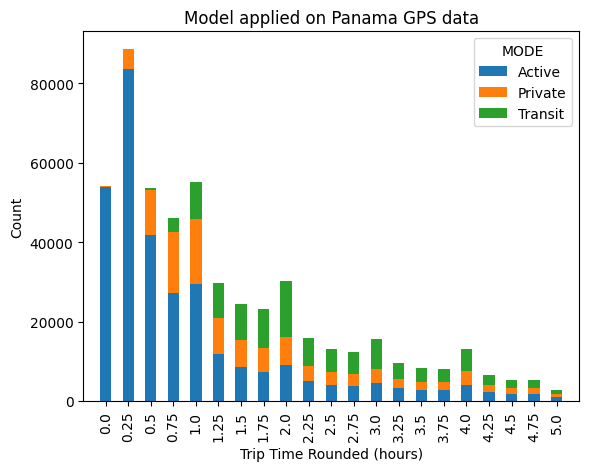

In [99]:
aa = Xy_GPS [['Trip_TravelTime_Length_hour','MODE']].copy()
aa['trip_time_rounded'] = (4 * aa['Trip_TravelTime_Length_hour']).round() / 4
bb = aa.groupby(['trip_time_rounded','MODE']).count().reset_index()

# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='trip_time_rounded', columns='MODE', values='Trip_TravelTime_Length_hour')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Time Rounded (hours)')
ax.set_ylabel('Count')

ax.set_xlim([-1, 21])

# Set the title of the chart
ax.set_title('Model applied on Panama GPS data')

# Show the chart
plt.show()

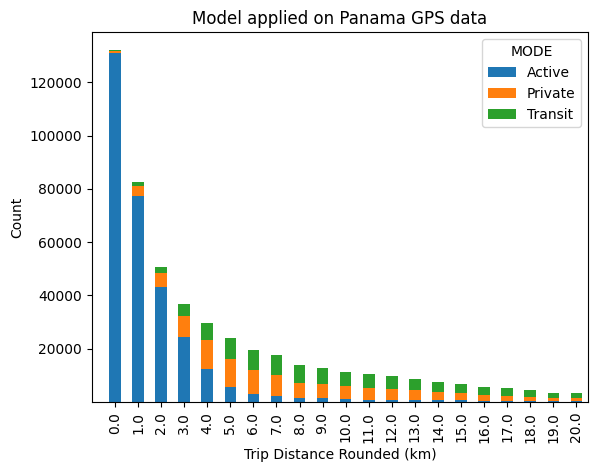

In [100]:
aa = Xy_GPS [['distance','MODE']].copy()
aa['distance_rounded'] = aa['distance'].round()
bb = aa.groupby(['distance_rounded','MODE']).count().reset_index()

# Pivot the data to create a stacked bar chart
pivot_df = bb.pivot(index='distance_rounded', columns='MODE', values='distance')

# Create the stacked bar chart
ax = pivot_df.plot(kind='bar', stacked=True)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('Trip Distance Rounded (km)')
ax.set_ylabel('Count')

ax.set_xlim([-1, 20.5])

# Set the title of the chart
ax.set_title('Model applied on Panama GPS data')

# Show the chart
plt.show()